# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
!pip install citipy
#TEST

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 623


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = 'http://api.openweathermap.org/data/2.5/weather'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = 'http://api.openweathermap.org/data/2.5/weather'
    params = {
        'q' : city,
        "appid" : weather_api_key}
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url, params=params).json()
       
         # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        
    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | narrabri
Processing Record 2 of Set 1 | varhaug
Processing Record 3 of Set 1 | rongai
Processing Record 4 of Set 1 | tuktoyaktuk
Processing Record 5 of Set 1 | grand gaube
Processing Record 6 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 7 of Set 1 | cape town
Processing Record 8 of Set 1 | awjilah
Processing Record 9 of Set 1 | torbay
Processing Record 10 of Set 1 | malanville
Processing Record 11 of Set 1 | surt
Processing Record 12 of Set 1 | leh
Processing Record 13 of Set 1 | talcahuano
Processing Record 14 of Set 1 | mataura
Processing Record 15 of Set 1 | mahebourg
Processing Record 16 of Set 1 | mamallapuram
Processing Record 17 of Set 1 | khatanga
Processing Record 18 of Set 1 | port-gentil
Processing Record 19 of Set 1 | atuona
Processing Record 20 of Set 1 | ushuaia
Processing Record 21 of Set 1 | sainte-marie
Processing Record 22 of Set 1 | ossora
Processing Re

Processing Record 39 of Set 4 | ocean city
Processing Record 40 of Set 4 | muroto
Processing Record 41 of Set 4 | ancud
Processing Record 42 of Set 4 | tucurui
Processing Record 43 of Set 4 | kuhdasht
Processing Record 44 of Set 4 | saint-philippe
Processing Record 45 of Set 4 | kaabong
Processing Record 46 of Set 4 | alekseyevsk
Processing Record 47 of Set 4 | labuhan
Processing Record 48 of Set 4 | arraial do cabo
Processing Record 49 of Set 4 | kaitangata
Processing Record 0 of Set 5 | shimoda
Processing Record 1 of Set 5 | jutai
Processing Record 2 of Set 5 | kalmunai
Processing Record 3 of Set 5 | lingao
Processing Record 4 of Set 5 | leningradskiy
Processing Record 5 of Set 5 | umzimvubu
City not found. Skipping...
Processing Record 6 of Set 5 | egvekinot
Processing Record 7 of Set 5 | attawapiskat
City not found. Skipping...
Processing Record 8 of Set 5 | pedernales
Processing Record 9 of Set 5 | marrakesh
Processing Record 10 of Set 5 | iskateley
Processing Record 11 of Set 5 |

Processing Record 28 of Set 8 | lorengau
Processing Record 29 of Set 8 | daru
Processing Record 30 of Set 8 | tanout
Processing Record 31 of Set 8 | taoudenni
Processing Record 32 of Set 8 | sola
Processing Record 33 of Set 8 | canico
Processing Record 34 of Set 8 | cravo norte
Processing Record 35 of Set 8 | sinfra
Processing Record 36 of Set 8 | sangar
Processing Record 37 of Set 8 | san juan del sur
Processing Record 38 of Set 8 | pionerskiy
Processing Record 39 of Set 8 | kaputa
Processing Record 40 of Set 8 | wazzan
City not found. Skipping...
Processing Record 41 of Set 8 | guaymas
Processing Record 42 of Set 8 | cody
Processing Record 43 of Set 8 | rustam
Processing Record 44 of Set 8 | kinablangan
Processing Record 45 of Set 8 | salina
Processing Record 46 of Set 8 | xinzhou
Processing Record 47 of Set 8 | amderma
City not found. Skipping...
Processing Record 48 of Set 8 | pocao de pedras
Processing Record 49 of Set 8 | abu samrah
Processing Record 0 of Set 9 | harper
Processin

Processing Record 17 of Set 12 | santa rosa
Processing Record 18 of Set 12 | nizhniy tagil-39
City not found. Skipping...
Processing Record 19 of Set 12 | robertsganj
Processing Record 20 of Set 12 | urubicha
Processing Record 21 of Set 12 | radhanpur
Processing Record 22 of Set 12 | port shepstone
Processing Record 23 of Set 12 | dom pedrito
Processing Record 24 of Set 12 | linkuva
Processing Record 25 of Set 12 | kendari
Processing Record 26 of Set 12 | mandiana
Processing Record 27 of Set 12 | hirata
Processing Record 28 of Set 12 | bhainsdehi
Processing Record 29 of Set 12 | braco do norte
Processing Record 30 of Set 12 | luganville
Processing Record 31 of Set 12 | gisborne
Processing Record 32 of Set 12 | lucapa
Processing Record 33 of Set 12 | jalapa
Processing Record 34 of Set 12 | kysyl-syr
Processing Record 35 of Set 12 | ternate
Processing Record 36 of Set 12 | phan thiet
Processing Record 37 of Set 12 | puerto escondido
Processing Record 38 of Set 12 | verkhnevilyuysk
Proces

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          569
Lat           569
Lng           569
Max Temp      569
Humidity      569
Cloudiness    569
Wind Speed    569
Country       569
Date          569
dtype: int64

In [6]:
# Display sample data
city_data_df['Max Temp'] = city_data_df['Max Temp'] - 273.15

In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,narrabri,-30.3167,149.7833,20.29,48,0,0.89,AU,1681184585
1,varhaug,58.6147,5.6457,8.25,94,100,9.58,NO,1681184585
2,rongai,-0.1733,35.8638,14.19,83,95,1.13,KE,1681184585
3,tuktoyaktuk,69.4541,-133.0374,-10.00,85,100,2.06,CA,1681184585
4,grand gaube,-20.0064,57.6608,25.21,85,100,7.97,MU,1681184585


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

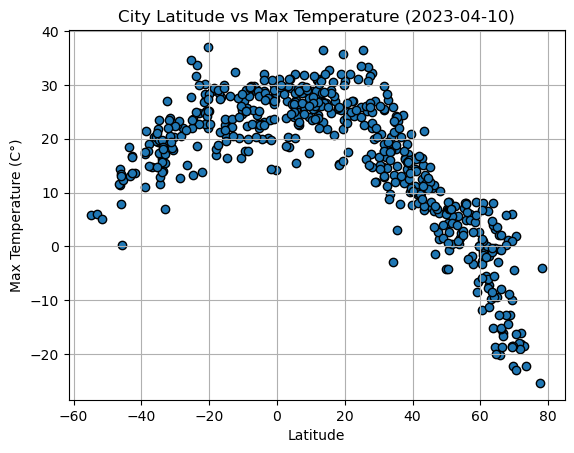

In [10]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df['Max Temp'], edgecolors='black' )
# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C°)")
plt.title("City Latitude vs Max Temperature (2023-04-10)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

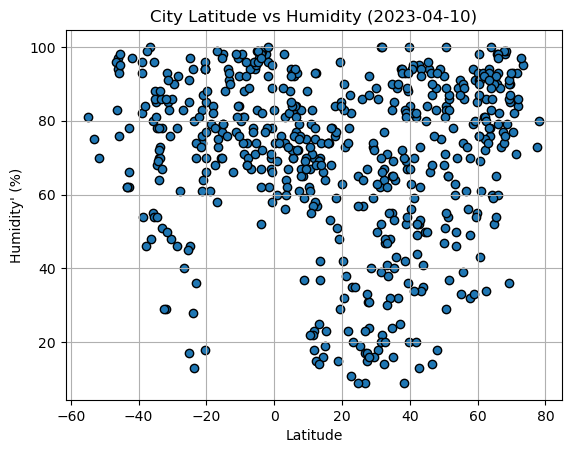

In [11]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df['Humidity'], edgecolors='black' )
# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel("Latitude")
plt.ylabel("Humidity' (%)")
plt.title("City Latitude vs Humidity (2023-04-10)")
plt.grid()
# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

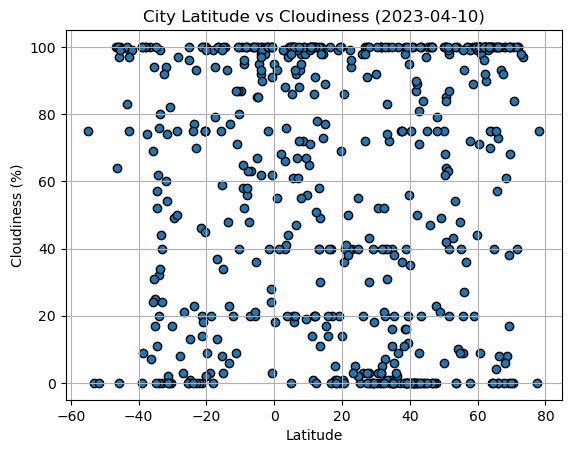

In [12]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df['Cloudiness'], edgecolors='black' )
# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs Cloudiness (2023-04-10)")
plt.grid()
# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

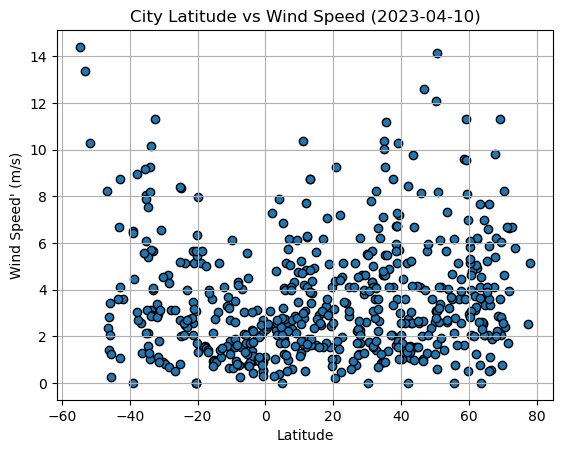

In [13]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df['Wind Speed'], edgecolors='black' )
# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel("Latitude")
plt.ylabel("Wind Speed' (m/s)")
plt.title("City Latitude vs Wind Speed (2023-04-10)")
plt.grid()
# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [14]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
def regression(x, y):
    slope, line_int, line_r, line_p, line_std_err= linregress(x, y)
    return slope, line_int, line_r, line_p, line_std_err

In [15]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,varhaug,58.6147,5.6457,8.25,94,100,9.58,NO,1681184585
3,tuktoyaktuk,69.4541,-133.0374,-10.00,85,100,2.06,CA,1681184585
6,awjilah,29.1081,21.2869,11.88,73,0,3.79,LY,1681184340
7,torbay,47.6666,-52.7314,1.43,83,0,5.66,CA,1681184586
8,malanville,11.8685,3.3899,27.97,18,86,1.74,BJ,1681184586


In [16]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,narrabri,-30.3167,149.7833,20.29,48,0,0.89,AU,1681184585
2,rongai,-0.1733,35.8638,14.19,83,95,1.13,KE,1681184585
4,grand gaube,-20.0064,57.6608,25.21,85,100,7.97,MU,1681184585
5,cape town,-33.9258,18.4232,16.32,70,20,1.03,ZA,1681184400
11,talcahuano,-36.7167,-73.1167,14.82,100,100,2.57,CL,1681184587


###  Temperature vs. Latitude Linear Regression Plot

r value is:  -0.8928941896556849


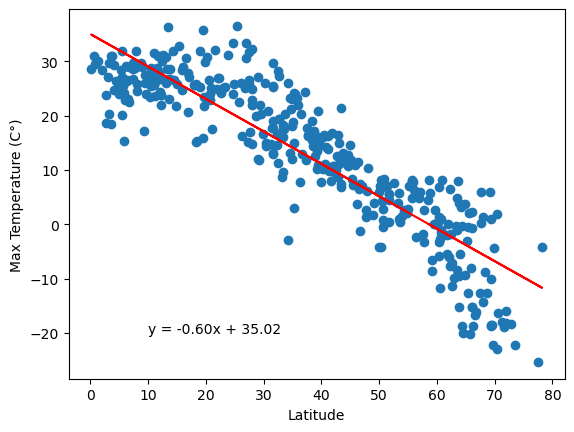

In [17]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df['Max Temp'] )
# Incorporate the other graph properties
# YOUR CODE HERE
slope, line_int, line_r, line_p, line_std_err = regression(northern_hemi_df["Lat"], northern_hemi_df['Max Temp'])
plt.plot(northern_hemi_df["Lat"], slope*northern_hemi_df["Lat"]+line_int, color='red')
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C°)")
plt.text(10, -20, ('y = %.2fx + %.2f' % (slope, line_int) )  )
print("r value is: ", line_r)
plt.show()

r value is:  0.6448614125567274


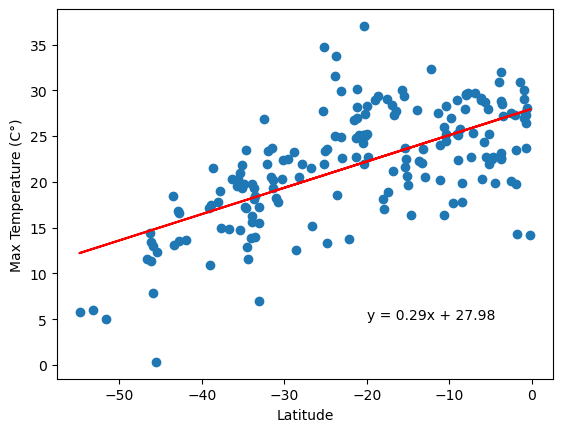

In [18]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df['Max Temp'] )
# Incorporate the other graph properties
# YOUR CODE HERE
slope, line_int, line_r, line_p, line_std_err = regression(southern_hemi_df["Lat"], southern_hemi_df['Max Temp'])
plt.plot(southern_hemi_df["Lat"], slope*southern_hemi_df["Lat"]+line_int, color='red')
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C°)")

plt.text(-20, 5, ('y = %.2fx + %.2f' % (slope, line_int) )  )
print("r value is: ", line_r)
plt.show()


**Discussion about the linear relationship:** In both graphs we can see a very straight forward relationship that as the latitude reaches 0 (the equator) the temperature increases.

### Humidity vs. Latitude Linear Regression Plot

r value is:  0.21504969621345638


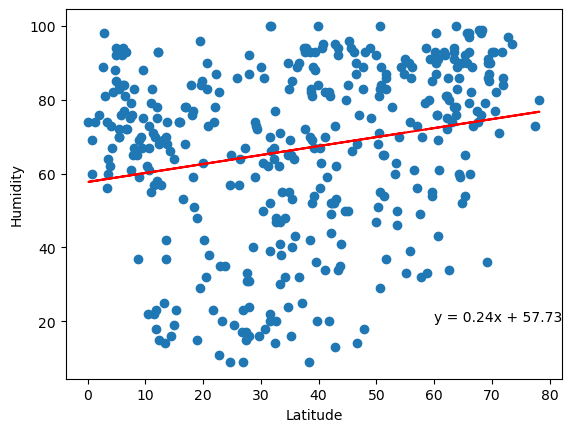

In [19]:
# Northern Hemisphere
# YOUR CODE HERE
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df['Humidity'] )
# Incorporate the other graph properties
# YOUR CODE HERE
slope, line_int, line_r, line_p, line_std_err = regression(northern_hemi_df["Lat"], northern_hemi_df['Humidity'])
plt.plot(northern_hemi_df["Lat"], slope*northern_hemi_df["Lat"]+line_int, color='red')
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.text(60, 20, ('y = %.2fx + %.2f' % (slope, line_int) )  )
print("r value is: ", line_r)
plt.show()

r value is:  0.14743437611991392


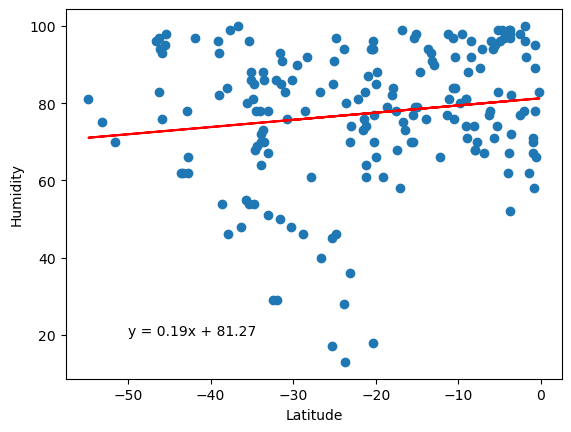

In [20]:
# Southern Hemisphere
# YOUR CODE HERE
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df['Humidity'] )
# Incorporate the other graph properties
# YOUR CODE HERE
slope, line_int, line_r, line_p, line_std_err = regression(southern_hemi_df["Lat"], southern_hemi_df['Humidity'])
plt.plot(southern_hemi_df["Lat"], slope*southern_hemi_df["Lat"]+line_int, color='red')
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.text(-50, 20, ('y = %.2fx + %.2f' % (slope, line_int) )  )
print("r value is: ", line_r)
plt.show()

**Discussion about the linear relationship:** Here the relationship is far less clear, as the line stays roughly the same on boths graphs, save for some of the more extreme outlier points, meaning there is not a strong relationship between them, as shown in the r value.

### Cloudiness vs. Latitude Linear Regression Plot

r value is:  0.05690168288879817


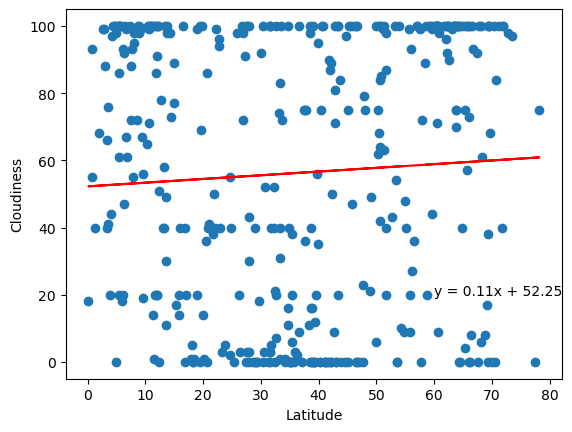

In [21]:
# Northern Hemisphere
# YOUR CODE HERE
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df['Cloudiness'] )
# Incorporate the other graph properties
# YOUR CODE HERE
slope, line_int, line_r, line_p, line_std_err = regression(northern_hemi_df["Lat"], northern_hemi_df['Cloudiness'])
plt.plot(northern_hemi_df["Lat"], slope*northern_hemi_df["Lat"]+line_int, color='red')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.text(60, 20, ('y = %.2fx + %.2f' % (slope, line_int) )  )
print("r value is: ", line_r)
plt.show()

r value is:  0.1836571767960599


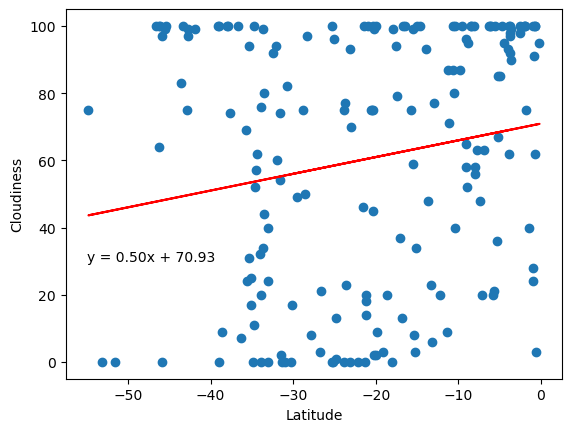

In [22]:
# Southern Hemisphere
# YOUR CODE HERE
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df['Cloudiness'] )
# Incorporate the other graph properties
# YOUR CODE HERE
slope, line_int, line_r, line_p, line_std_err = regression(southern_hemi_df["Lat"], southern_hemi_df['Cloudiness'])
plt.plot(southern_hemi_df["Lat"], slope*southern_hemi_df["Lat"]+line_int, color='red')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.text(-55, 30, ('y = %.2fx + %.2f' % (slope, line_int) )  )
print("r value is: ", line_r)
plt.show()

**Discussion about the linear relationship:** The amount of clouds seem be irrelevant to the Latitude as shown in the r-value and in the graph itself, with even incredibly high cloudiness both away from and at 0 Latitude approx.

### Wind Speed vs. Latitude Linear Regression Plot

r value is:  0.14099952459050005


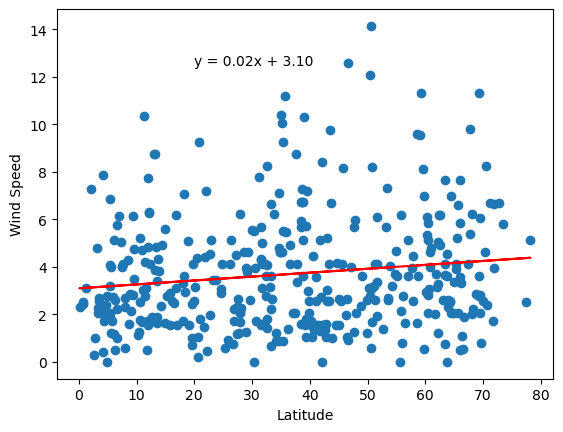

In [23]:
# Northern Hemisphere
# YOUR CODE HERE
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df['Wind Speed'] )
# Incorporate the other graph properties
# YOUR CODE HERE
slope, line_int, line_r, line_p, line_std_err = regression(northern_hemi_df["Lat"], northern_hemi_df['Wind Speed'])
plt.plot(northern_hemi_df["Lat"], slope*northern_hemi_df["Lat"]+line_int, color='red')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.text(20, 12.5, ('y = %.2fx + %.2f' % (slope, line_int) )  )
print("r value is: ", line_r)
plt.show()

r value is:  -0.47863011958469365


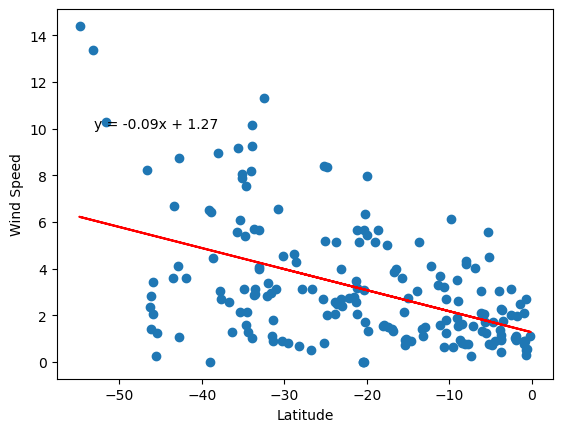

In [24]:
# Southern Hemisphere
# YOUR CODE HERE
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df['Wind Speed'] )
# Incorporate the other graph properties
# YOUR CODE HERE
slope, line_int, line_r, line_p, line_std_err = regression(southern_hemi_df["Lat"], southern_hemi_df['Wind Speed'])
plt.plot(southern_hemi_df["Lat"], slope*southern_hemi_df["Lat"]+line_int, color='red')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.text(-53, 10, ('y = %.2fx + %.2f' % (slope, line_int) )  )
print("r value is: ", line_r)
plt.show()

**Discussion about the linear relationship:** Once more there doesn't seem to be much in relation to the x and y values. In the southern hemisphere there seems to be some distant relationship, but that's likely due to the random data and more testing would likely show it's similar to the northern hemisphere.